In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [8]:
final_water = pd.read_csv('./water_final.csv', low_memory=False)

In [9]:
final_water = final_water.iloc[:,2:-6]
final_water['Date'] = pd.to_datetime(final_water['Date'])
final_water.head(10)

,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,FlowStage,GaugeHeight,GroupCode,HUC12,Lab,Latitude,Layer,Longitude,LowerPycnocline,MeasureValue,Method,ModifiedDate,Other Comments,Other Conditions,Parameter,ParameterName_CBP,ParameterName_CMC,PrecipType,PrecisionPC,Pressure,Problem,Program,Project,Qualifier,Rainfall,Rainfall Within 24 Hours,Rainfall Within 48 Hours,SampleDepth,SampleId,SampleReplicateType,SampleType,Sea State,Source,Station,StationCode,StationName,Stream Flow,Tidal Stage,TideStage,TierLevel,Time,TotalDepth,Unit,UpperPycnocline,Water Color,Water Color Description,Water Odor,Water Odor Description,Water Surfaces,WaveHeight,Weather Conditions Day Before Yesterday,Weather Conditions Today,Weather Conditions Yesterday,WindDirection,WindSpeed,state
0,NaN,NaN,NaN,NaN,NaN,CMC,2018-04-28,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.480194,NaN,-75.930028,NaN,14.970,NaN,2020-04-25T17:31:58.767,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,Chlorophyll a;b;c,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,7.8,0.5,1.0,NaN,NaN,NaN,NaN,NaN,FB.FOBBT01,FOB BT01,NaN,Outgoing (Ebb),NaN,p2,12:05:00,NaN,ug/L,NaN,NaN,Muddy,NaN,NaN,NaN,NaN,NaN,Partly cloudy,NaN,W,1-10 knots,MD
1,NaN,NaN,NaN,NaN,NaN,CMC,2018-04-28,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.480444,NaN,-75.902528,NaN,20.002,NaN,2020-04-25T17:31:59.173,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,Chlorophyll a;b;c,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,7.8,0.5,1.0,NaN,NaN,NaN,NaN,NaN,FB.FOBBT02,FOB BT02,NaN,Outgoing (Ebb),NaN,p2,12:40:00,NaN,ug/L,NaN,NaN,Muddy,NaN,NaN,NaN,NaN,NaN,Partly cloudy,NaN,W,1-10 knots,MD
2,NaN,NaN,NaN,NaN,NaN,CMC,2018-04-28,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.466889,NaN,-75.873639,NaN,26.204,NaN,2020-04-25T17:31:59.36,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,Chlorophyll a;b;c,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,7.8,0.5,1.0,NaN,NaN,NaN,NaN,NaN,FB.FOBBT03,FOB BT03,NaN,Outgoing (Ebb),NaN,p2,13:13:00,NaN,ug/L,NaN,NaN,Muddy,NaN,NaN,NaN,NaN,NaN,Partly cloudy,NaN,S,1-10 knots,MD
3,NaN,NaN,NaN,NaN,NaN,CMC,2018-04-28,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.454000,NaN,-75.854444,NaN,47.652,NaN,2020-04-25T17:31:59.627,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,Chlorophyll a;b;c,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,7.8,0.5,1.0,NaN,NaN,NaN,NaN,NaN,FB.FOBBT04,FOB BT04,NaN,Outgoing (Ebb),NaN,p2,13:53:00,NaN,ug/L,NaN,NaN,Muddy,NaN,NaN,NaN,NaN,NaN,Partly cloudy,NaN,SW,1-10 knots,MD
4,NaN,NaN,NaN,NaN,NaN,CMC,2018-04-28,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.463667,NaN,-75.843528,NaN,38.820,NaN,2020-04-25T17:31:59.937,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,Chlorophyll a;b;c,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,7.8,0.5,1.0,NaN,NaN,NaN,NaN,NaN,FB.FOBBT05,FOB BT05,NaN,Outgoing (Ebb),NaN,p2,14:24:00,NaN,ug/L,NaN,NaN,Muddy,NaN,NaN,NaN,NaN,NaN,Partly cloudy,NaN,SW,1-10 knots,MD
5,NaN,NaN,NaN,NaN,NaN,CMC,2018-04-28,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.459333,NaN,-75.880056,NaN,34.388,NaN,2020-04-25T17:32:00.157,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,Chlorophyll a;b;c,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,7.8,0.5,1.0,NaN,NaN,NaN,NaN,NaN,FB.FOBBT06,FOB BT06,NaN,Outgoing (Ebb),NaN,p2,14:53:00,NaN,ug/L,NaN,NaN,Muddy,NaN,NaN,NaN,NaN,NaN,Partly cloudy,NaN,SW,1-10 knots,MD
6,NaN,NaN,NaN,NaN,NaN,CMC,2018-05-08,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.480194,NaN,-75.930028,NaN,12.940,NaN,2020-04-25T21:31:17.11,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,Chlorophyll a;b;c,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,0,0.5,1.0,NaN,NaN,NaN,NaN,NaN,FB.FOBBT01,FOB BT01,NaN,Incoming (Flood),NaN,p2,10:43:00,NaN,ug/L,NaN,NaN,Muddy,NaN,NaN,NaN,NaN,NaN,Sunny,NaN,S,1-10 knots,MD
7,NaN,NaN,NaN,NaN,NaN,CMC,2018-05-08,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.480444,NaN,-75.902528,NaN,22.214,NaN,2020-04-25T21:31:17.703,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,Chlorophyll a;b;c,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,0,0.5,1.0,NaN,NaN,NaN,NaN,NaN,FB.FOBBT02,FOB BT02,NaN,Incoming (Flood),NaN,p2,11:16:00,NaN,ug/L,NaN,NaN,Muddy,NaN,NaN,NaN,NaN,NaN,Sunny,NaN,E,1-10 knots,MD
8,NaN,NaN,NaN,NaN,NaN,CMC,2018-05-08,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.466889,NaN,-75.873639,NaN,42.264,NaN,2020-04-25T21:31:17.987,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,

In [10]:
final_water.shape

(2708717, 65)

In [11]:
final_water.isnull().sum()/final_water.shape[0]

Agency                                     0.097559
BiasPC                                     0.999980
CloudCover                                 0.176042
Comments                                   0.964817
Cruise                                     0.097559
Database                                   0.000000
Date                                       0.000000
FieldActivityEventType                     0.927476
FieldActivityRemark                        1.000000
FlowStage                                  0.997810
GaugeHeight                                0.963166
GroupCode                                  0.902441
HUC12                                      0.097559
Lab                                        0.680634
Latitude                                   0.000000
Layer                                      0.097763
Longitude                                  0.000000
LowerPycnocline                            0.843308
MeasureValue                               0.000000
Method      

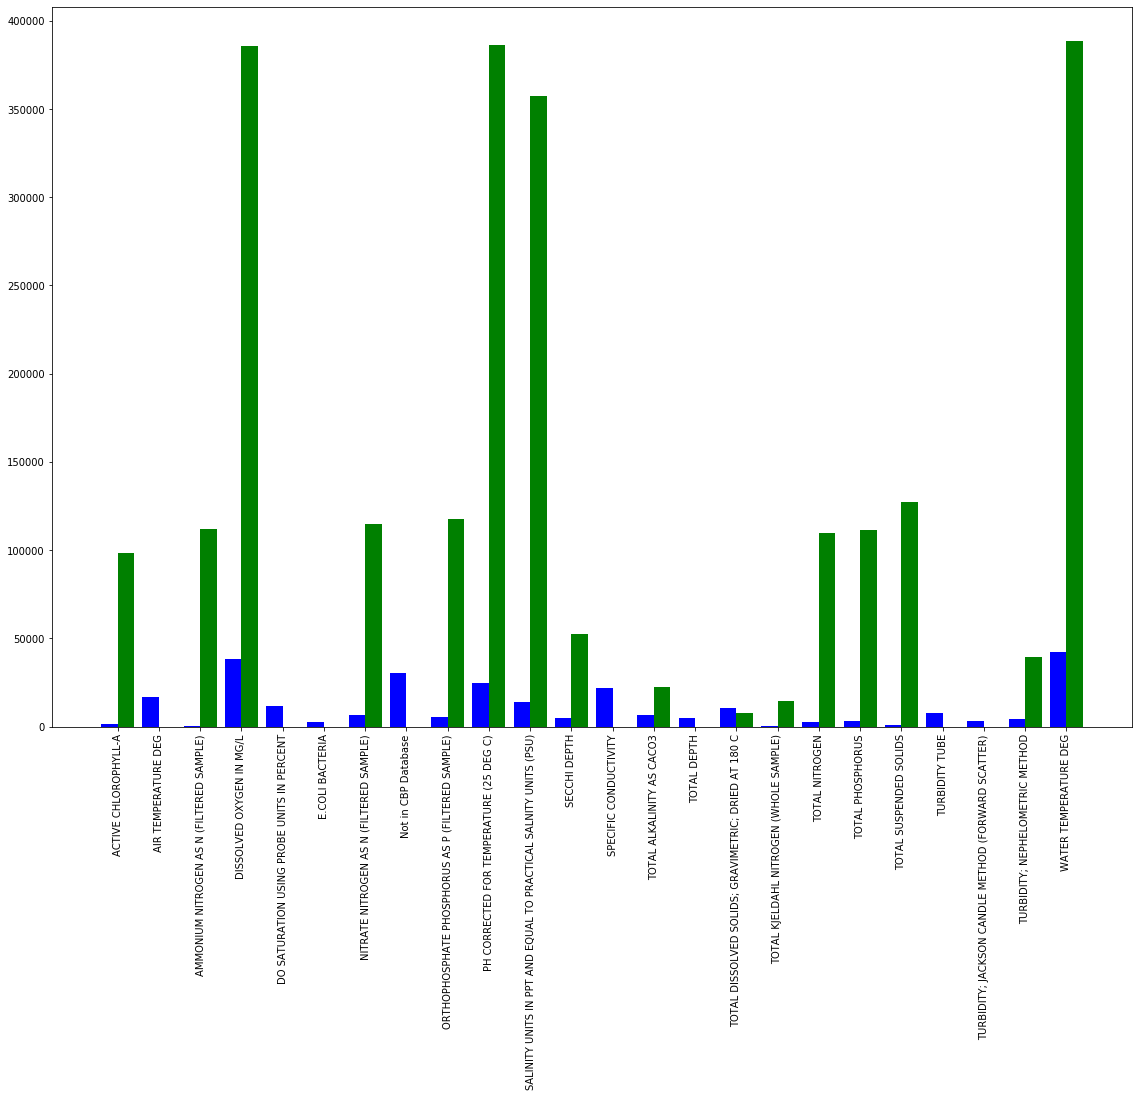

In [12]:
df_cmc_counts = final_water['ParameterName_CBP'][final_water['Database']=='CMC'].value_counts()
df_cbp_counts = final_water['ParameterName_CBP'][final_water['Database']=='CBP'].value_counts()
df_counts = pd.concat([df_cmc_counts, df_cbp_counts], axis=1, sort=True)
df_counts.columns = ['CMC', 'CBP']
df_counts = df_counts.fillna(0)

fig, ax = plt.subplots(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
x = np.arange(df_counts.shape[0])
bar_width = 0.4
b1 = ax.bar(x, df_counts['CMC'], color='b', width=bar_width)
b2 = ax.bar(x + bar_width, df_counts['CBP'], color='g', width=bar_width)

ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(df_counts.index, rotation=90)
plt.show();

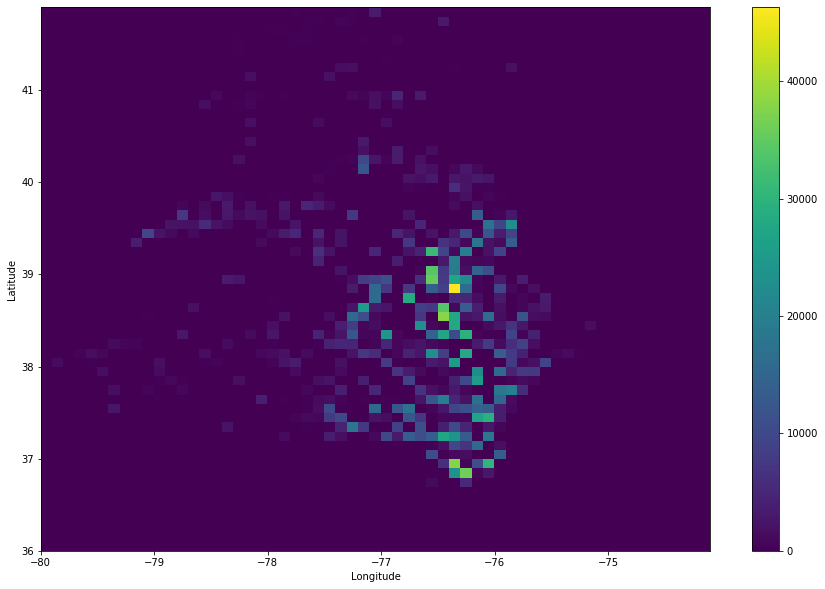

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
heat = ax.hist2d(final_water['Longitude'], final_water['Latitude'], bins=[np.arange(-80,-74,0.1), np.arange(36,42,0.1)])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
fig.colorbar(heat[3], ax=ax)
plt.show();

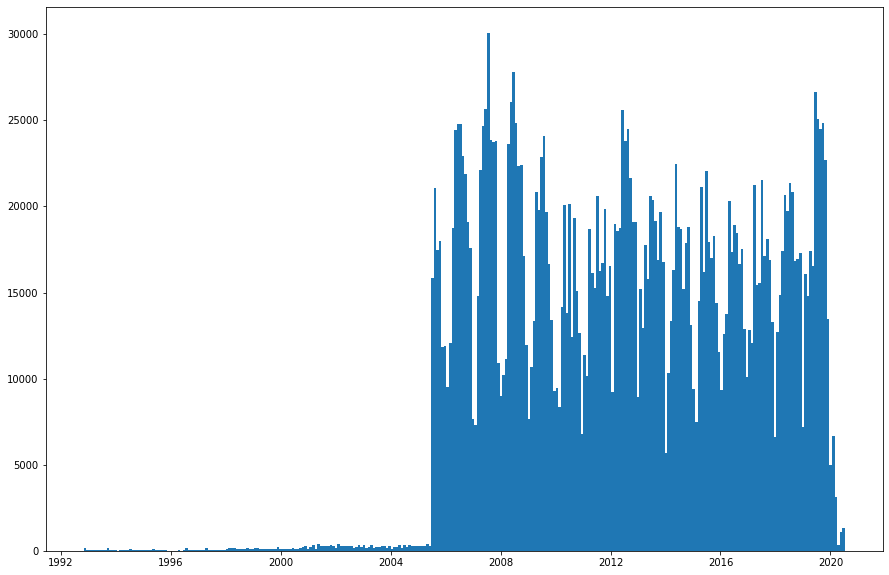

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
hist = ax.hist(final_water['Date'], bins=300)
plt.show()